In [1]:
# EDA on Tipping data
### Project 6 goal is to create a EDA project using the concepts learnt so far - git, python, pandas, seaborn,matplotlib and more
#### Dataset[link](https://rdrr.io/cran/reshape2/man/tips.html)
#### It contains data recorded by a waiter about each tip he received over a period of few months working at a restaurant. 

# **Exploratory Data Analysis using Tipping Dataset**

### Author: Jaya
### Date: 02/01/2024
#### Purpose: Project 6's goal is to create a EDA project using the concepts learnt so far - git, python, pandas, seaborn,matplotlib and more
#### Dataset: [https://rdrr.io/cran/reshape2/man/tips.html]
#### It contains data recorded by a waiter about each tip he received over a period of few months working at a restaurant. 

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step 1 - Data Acquisition 

In [7]:
# Load the dataset into a pandas DataFrame
df = sns.load_dataset('tips')

# Inspect first rows of the DataFrame
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Step 2 - Initial data inspection

In [8]:
#Understand the data with initial data inspection
print(df.head(10))
print(df.shape)
print(df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
(244, 7)
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


## Step 3. Initial Descriptive Statistics

In [9]:
#use describe to get the descriptive analysis of numerical data
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


## Step 4. Initial Data Distribution for Numerical Columns

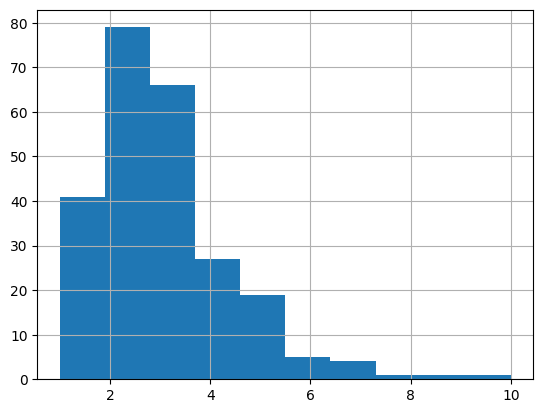

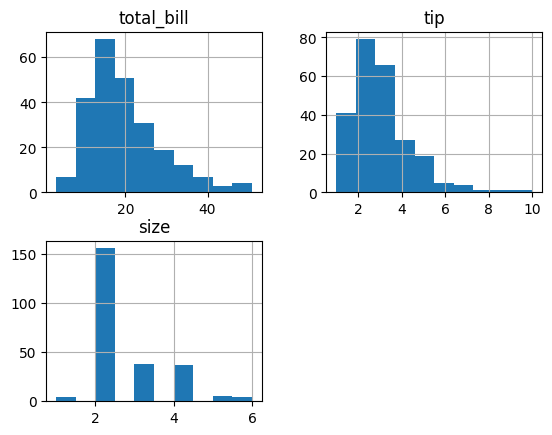

In [10]:
# Inspect histogram by numerical column
df['tip'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

### Observations:
* Looking at the first histogram, we can infer that most people tip between $1 to $4 
* From  the last graph we can infer that people who dine come in partie of two to four.

## Step 5. Initial Data Distribution for Categorical Columns

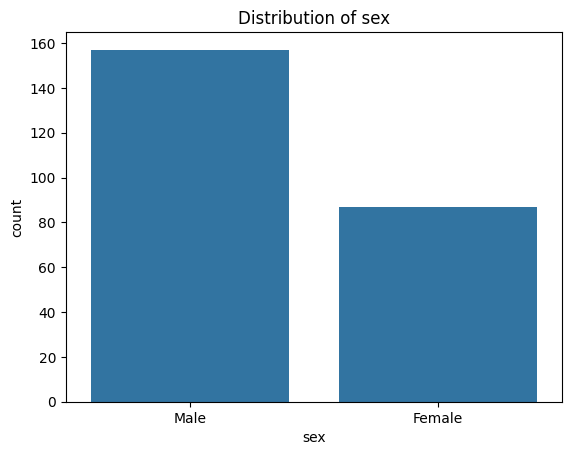

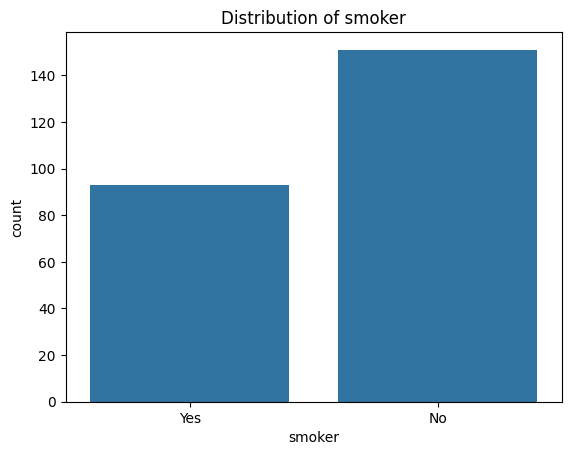

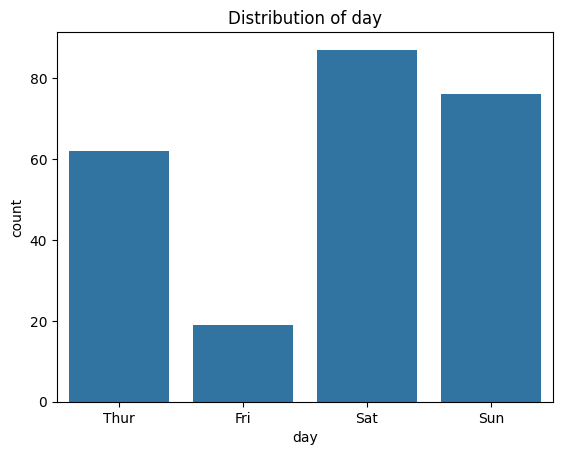

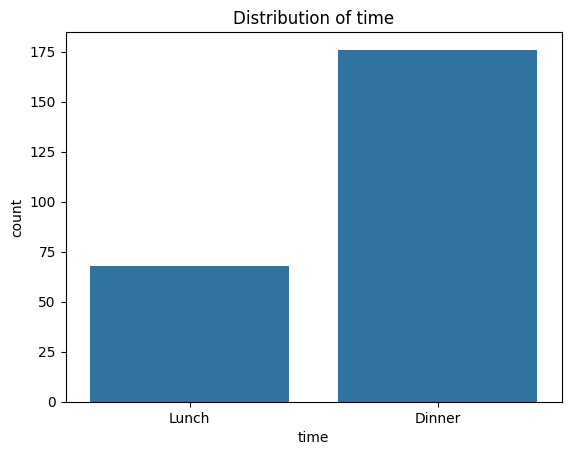

In [11]:
# Inspect value counts by categorical column
df['sex'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

### Observations
* Mostly men dine at the restaurants in comparision to women as we can infer from graph 1
* Graph 2 shows that there are more non-smokers who dine at the restaurant
* Staturday and Sunday are the days when a lot of customers come in to dine as per graph 3
* Dinners are busier than lunches as people prefer eating during the evening as we can see in Graph 4

## Step 6. Initial Data Transformation and Feature Engineering

In [15]:
# Rename Column
df.rename(columns={'sex': 'gender'}, inplace=True)

# Add a new column
df['tip_percentile'] = round((df['tip']/df['total_bill']) * 100, 2)

,total_bill,tip,gender,smoker,day,time,size,tip_percentile
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


## Step 7. Initial Visualizations

### Chart 1: 
* Goal: Checking if there is any gender disparity in tipping amount. 
* Chart Type: Using barplot to analyse Gender vs Tip. 


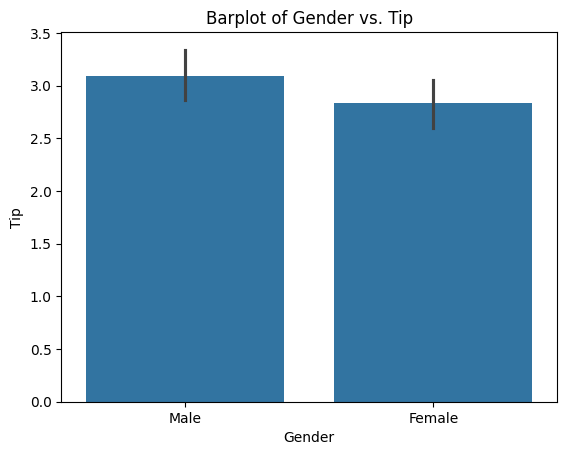

In [16]:
# barplot 
sns.barplot(x=df['gender'], y=df['tip'])
plt.xlabel('Gender')
plt.ylabel('Tip')
plt.title('Barplot of Gender vs. Tip')
plt.show()

### Obersvations: 
Males pay slightly higher in tips than females. However the difference is not too much. 

### Chart 2: 
* Goal: Checking if there is any relation between total bill and tips amount.  
* Chart Type: Using Lineplot to analyse total bill vs Tip. 

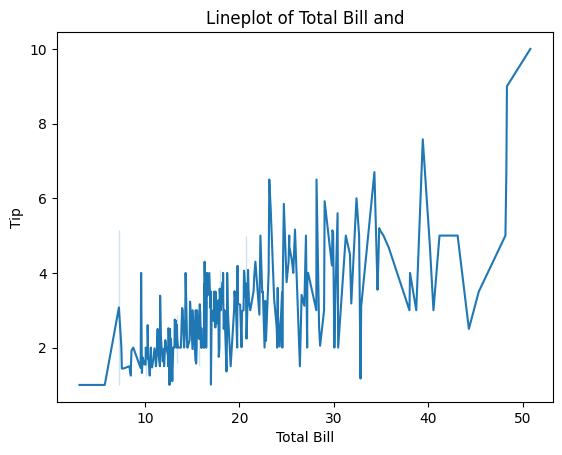

In [35]:
# Lineplot
sns.lineplot(x=df['total_bill'], y=df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Lineplot of Total Bill and')
plt.show()

### Observation: 
The lineplot of Total bill and Tip show that as the bill increases, tip amount also increases. It shows that most of bill ranges from $10 to $25. 


### Chart 3: 
* Goal: Analysing distribution of Total Bill amount by day of week.
* Chart Type: Using box plot to analyse

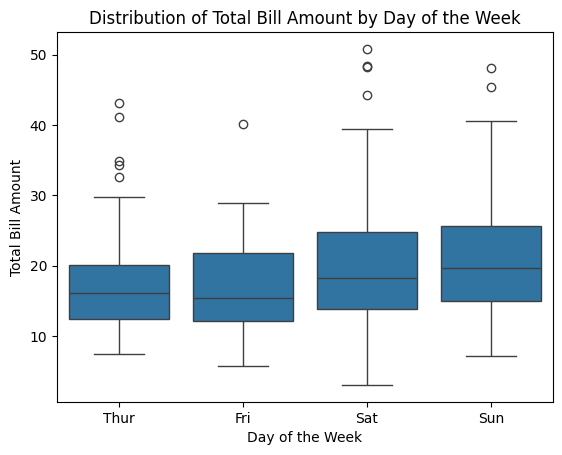

In [37]:
# box plot of total bill amount by day of the week
sns.boxplot(x=df['day'], y=df['total_bill'])
plt.title('Distribution of Total Bill Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill Amount')
plt.show()


### Observations 
The above plot displays the distribution of total bill amount for each day of the week and we can infer that bill amount is the highest on saturday, followed by sunday's and thrusday's bill amount